## Neural Networks from the Ground Up

- The main idea is to build a pathway for understanding the core concepts of neural networks.





**This notebook is inspired in:** https://dennybritz.com/posts/wildml/implementing-a-neural-network-from-scratch/

## Package imports

In [ ]:
# Imports

import matplotlib.pyplot as plt
import numpy as np
import sklearn
import sklearn.datasets
import sklearn.linear_model
import matplotlib
from sklearn.datasets import make_circles
from sklearn.linear_model import LogisticRegression, SGDClassifier

## Dataset

- Let's play with *make_circles* dataset;
- In our dataset X is a shape matrix (200, 2) where each row represents a point in 2D space. And y is a shape vector (200,) containing the labels for each point in X. In particular, for this dataset, the labels are 0 or 1, representing the two concentric circles.

F**or more information:**
https://scikit-learn.org/stable/modules/linear_model.html

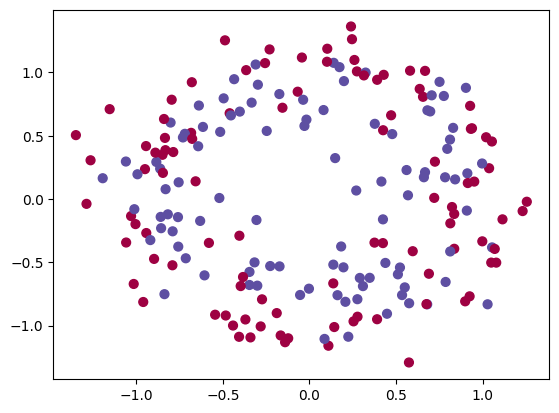

In [ ]:
X, y = make_circles(n_samples=200, noise=0.20, random_state=42) # X is the data set and y are the labels
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)

## You can already see that there's no linear separation, but let's try some algorithms

Let's try **Logistic Regression**.

- Logistic regression assumes that the relationship between the input features and the output variable is linear.

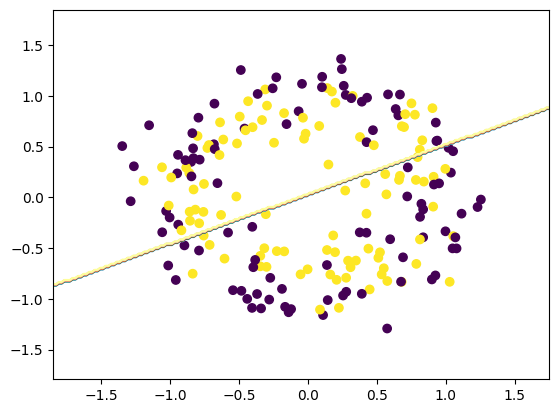

In [ ]:
# Fit the model
model = LogisticRegression().fit(X, y)

# Visualize the data and the decision boundary
plt.scatter(X[:, 0], X[:, 1], c=y)

# Create a mesh to plot the decision boundary
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict the class for each point in the mesh
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, cmap=plt.cm.Paired)

plt.show()


Text(0.5, 1.0, 'Logistic Regression')

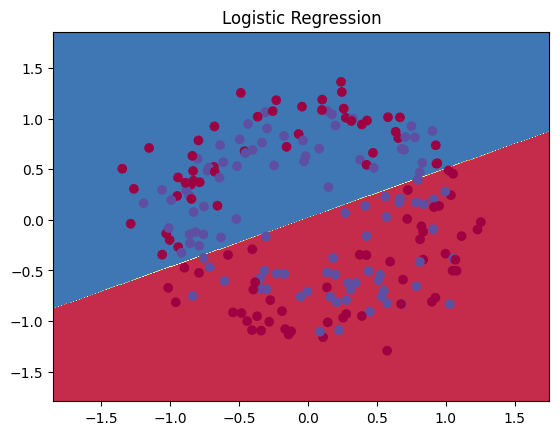

In [ ]:
def plot_decision_boundary(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)


plot_decision_boundary(lambda x: model.predict(x))
plt.title("Logistic Regression")

**Let's now try the Stochastic Gradient Descent Classifier (SGDClassifier)**

- The SGDClassifier is a stochastic gradient descent classifier, applicable to both linear and non-linear classification problems within machine learning. It stands as a more potent algorithm compared to logistic regression.
- However, the obtained results are notably deviating from the anticipated outcome.

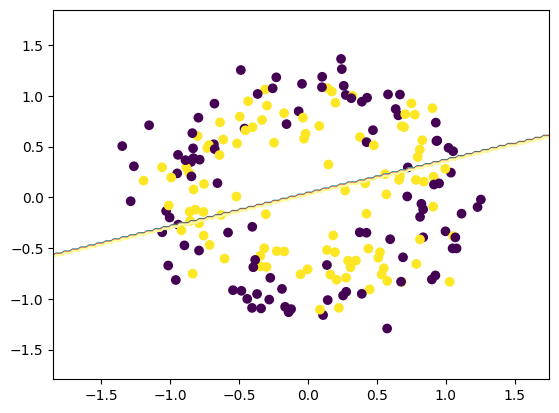

In [ ]:
# Fit the model
model = SGDClassifier().fit(X, y)

# Visualize the data and the decision boundary
plt.scatter(X[:, 0], X[:, 1], c=y)

# Create a mesh to plot the decision boundary
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict the class for each point in the mesh
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, cmap=plt.cm.Paired)

plt.show()

Text(0.5, 1.0, 'SGD Classifier')

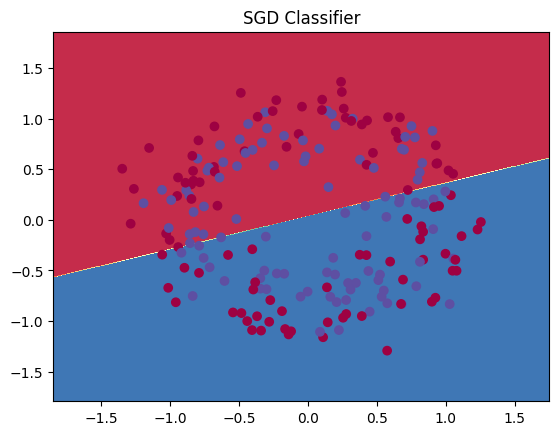

In [ ]:
def plot_decision_boundary(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)


plot_decision_boundary(lambda x: model.predict(x))
plt.title("SGD Classifier")

## Building a Neural Network

We will be building a 3-layer neural network with one input layer, one hidden layer, and one output layer.

- Here some concepts to keep in mind:

 **Input layer**: The input layer is the first layer of the neural network. It receives the data from the outside world. In this case, the input layer will have 2 nodes, one for each feature of the data (x and y coordinates).

 **Hidden layer:** The hidden layer is the middle layer of the neural network. It is responsible for processing the data from the input layer and generating a more abstract representation of the data. I

  **Output layer:** The output layer is the last layer of the neural network. It generates the predictions of the neural network. In this case, the output layer will have 2 nodes, one for each class (red or blue).

  **Activation function**: The activation function is a function that is applied to the output of each neuron in the neural network. It helps to introduce non-linearity into the neural network, which allows it to learn more complex relationships between the input and output data. In this case, the activation function for the output layer will be the softmax function. The softmax function is a function that takes a vector of real numbers and outputs a vector of probabilities, where each probability represents the likelihood of the input belonging to a particular class.

  **Loss function**: The loss function is a function that measures the error between the predictions of the neural network and the actual labels. The goal of the neural network is to minimize the loss function. In this case, the loss function will be the cross-entropy loss function. The cross-entropy loss function is a measure of how different the predictions of the neural network are from the actual labels.

  **Gradient descent**: Gradient descent is an iterative optimization algorithm that is used to minimize the loss function. The algorithm works by repeatedly updating the weights of the neural network in the direction of the steepest descent of the loss function.

  **Backpropagation**: Backpropagation is an algorithm that is used to calculate the gradients of the loss function with respect to the weights of the neural network. The algorithm works by propagating the errors from the output layer back to the input layer, layer by layer.

In [ ]:
num_examples = len(X) # training set size
nn_input_dim = 2 # input layer dimensionality
nn_output_dim = 2 # output layer dimensionality

# Gradient descent parameters (by hand)
epsilon = 0.01 # learning rate for gradient descent
reg_lambda = 0.01 # regularization strength

In [ ]:
# Helper function to evaluate the total loss on the dataset
def calculate_loss(model):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propagation to calculate our predictions
    z1 = X.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    # Calculating the loss
    corect_logprobs = -np.log(probs[range(num_examples), y])
    data_loss = np.sum(corect_logprobs)
    # Add regulatization term to loss (optional)
    data_loss += reg_lambda/2 * (np.sum(np.square(W1)) + np.sum(np.square(W2)))
    return 1./num_examples * data_loss

In [ ]:
# Helper function to predict an output (0 or 1)
def predict(model, x):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propagation
    z1 = x.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    return np.argmax(probs, axis=1)

In [ ]:
# This function learns parameters for the neural network and returns the model.
# - nn_hdim: Number of nodes in the hidden layer
# - num_passes: Number of passes through the training data for gradient descent
# - print_loss: If True, print the loss every 1000 iterations
def build_model(nn_hdim, num_passes=20000, print_loss=False):

    # Initialize the parameters to random values. We need to learn these.
    np.random.seed(0)
    W1 = np.random.randn(nn_input_dim, nn_hdim) / np.sqrt(nn_input_dim)
    b1 = np.zeros((1, nn_hdim))
    W2 = np.random.randn(nn_hdim, nn_output_dim) / np.sqrt(nn_hdim)
    b2 = np.zeros((1, nn_output_dim))

    # This is what we return at the end
    model = {}

    # Gradient descent. For each batch...
    for i in range(0, num_passes):

        # Forward propagation
        z1 = X.dot(W1) + b1
        a1 = np.tanh(z1)
        z2 = a1.dot(W2) + b2
        exp_scores = np.exp(z2)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

        # Backpropagation
        delta3 = probs
        delta3[range(num_examples), y] -= 1
        dW2 = (a1.T).dot(delta3)
        db2 = np.sum(delta3, axis=0, keepdims=True)
        delta2 = delta3.dot(W2.T) * (1 - np.power(a1, 2))
        dW1 = np.dot(X.T, delta2)
        db1 = np.sum(delta2, axis=0)

        # Add regularization terms (b1 and b2 don't have regularization terms)
        dW2 += reg_lambda * W2
        dW1 += reg_lambda * W1

        # Gradient descent parameter update
        W1 += -epsilon * dW1
        b1 += -epsilon * db1
        W2 += -epsilon * dW2
        b2 += -epsilon * db2

        # Assign new parameters to the model
        model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}

        # Optionally print the loss.
        # This is expensive because it uses the whole dataset, so we don't want to do it too often.
        if print_loss and i % 1000 == 0:
          print("Loss after iteration %i: %f" %(i, calculate_loss(model)))

    return model

Loss after iteration 0: 0.694753
Loss after iteration 1000: 0.588377
Loss after iteration 2000: 0.580077
Loss after iteration 3000: 0.576304
Loss after iteration 4000: 0.574118
Loss after iteration 5000: 0.572753
Loss after iteration 6000: 0.571864
Loss after iteration 7000: 0.571268
Loss after iteration 8000: 0.570858
Loss after iteration 9000: 0.570569
Loss after iteration 10000: 0.570361
Loss after iteration 11000: 0.570209
Loss after iteration 12000: 0.570096
Loss after iteration 13000: 0.570010
Loss after iteration 14000: 0.569945
Loss after iteration 15000: 0.569894
Loss after iteration 16000: 0.569855
Loss after iteration 17000: 0.569823
Loss after iteration 18000: 0.569799
Loss after iteration 19000: 0.569779


Text(0.5, 1.0, 'Decision Boundary for hidden layer size 3')

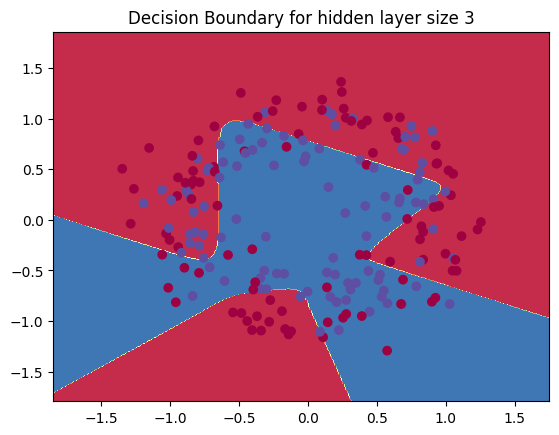

In [ ]:
# Build a model with a 3-dimensional hidden layer
model = build_model(3, print_loss=True)

# Plot the decision boundary
plot_decision_boundary(lambda x: predict(model, x))
plt.title("Decision Boundary for hidden layer size 3")